In [1]:
# import numpy
import numpy as np
import seaborn as sns

In [2]:
# people weights 
weights = [94.93428306,  82.23471398, 97.95377076, 115.46059713, 80.31693251,  80.31726086, 116.58425631, 
           100.34869458,  75.61051228, 95.85120087, 75.73164614, 75.68540493, 89.83924543,  46.73439511,  
           50.50164335,  73.75424942,  64.74337759,  91.28494665, 66.83951849, 56.75392597, 114.31297538, 
           80.48447399,  86.35056409,  56.50503628, 74.11234551,  66.1092259 ,  53.49006423,  68.75698018,
           58.9936131 ,  62.0830625 ,  58.98293388,  83.52278185, 64.86502775,  54.42289071,  73.22544912,  
           52.7915635 ,67.08863595,  45.40329876,  51.71813951,  66.96861236, 72.3846658 ,  66.71368281,  
           63.84351718,  61.98896304, 50.2147801 ,  57.80155792,  60.39361229,  75.57122226, 68.4361829 , 47.36959845]

#### Set the significance level (alpha) to 0.05

In [3]:
alpha = 0.05

#### Create function `evaluate_test` which prints a conclusion of hypothesis test based on p-value and alpha

PARAMS:
- p (float) - p-value from test
- alpha (float) - significance level


In [4]:
def evaluate_test(p: float, alpha: float) -> None:
    if p < alpha: print('H0 is rejected.')
    else: print('H0 is not rejected.')

#### Import Shapiro-Wilk Test to test if weights are normally distributed

- H0 = weights are normally distributed
- HA = weights are not normally distributed
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [5]:
from scipy import stats

In [6]:
results = stats.shapiro(weights)
results

ShapiroResult(statistic=0.9404902458190918, pvalue=0.014088480733335018)

#### Use function `evaluate_test` to make conclusion if weights are normally distributed

In [7]:
evaluate_test(results[1], alpha)

H0 is rejected.


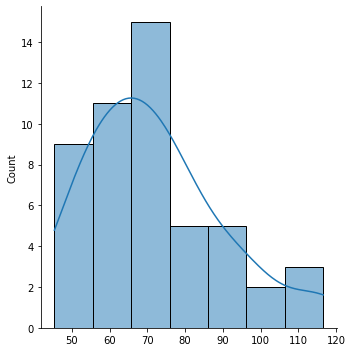

In [8]:
# looks like a reasonable conclusion
sns.displot(weights, kde=True)

#### Test the hypothesis that mean of weights is equal to 72

- use one sample t-test
- H0: mean = 72
- HA: mean != 72
- note that we don't know the population standard deviation

In [9]:
t_results = stats.ttest_1samp(weights, 72)
t_results

Ttest_1sampResult(statistic=-0.02860345905486303, pvalue=0.977297036129294)

#### Use function `evaluate_test` to make conclusion if the mean of the heights is 72

In [10]:
evaluate_test(t_results[1], alpha)

H0 is not rejected.


In [11]:
# looks like a reasonable conclusion
np.mean(weights)

71.9277206544

In [12]:
# salaries in the first company
salaries_company_A = [ 62779.75930907,  67487.49834604,  78998.91885801,  92801.06354333,
        94917.76195759,  85409.43843246,  65536.36510309,  97608.88920408,
        79613.1791369 ,  74035.25988438,  72698.71057961,  57170.2204782 ,
        96496.56571672,  78123.01652012,  69617.56847376,  89109.14505065,
        91809.98342107,  54010.91167324, 103259.7319888 , 113319.79557154,
        81529.81385057,  83590.49251746, 115902.53443622,  63608.1666576 ,
        72175.25765417,  88719.32305603,  97215.1090373 ,  80570.98830349,
        67796.25874935,  99321.80738101]

# salaries in the second company
salaries_company_B = [ 89845.96793876,  90027.93042629, 108596.08141043, 120113.67952031,
        94794.04532001,  99565.51332692, 110927.06162603,  85471.82457925,
        79030.8553638 ,  82644.84718934,  71592.66608011,  68244.23637394,
       134420.97566401,  72106.76757987,  95429.7573215 ,  88285.90615416,
       110973.4078626 ,  92323.32822085, 117740.37152488,  87412.61048855,
        94906.53993793, 105017.39597368,  93983.46012639, 100538.051311  ,
        95673.65143504,  61727.33698247, 105311.27474286, 113551.6401474 ,
        87408.82036567,  85895.00912077]

#### Test the hypothesis that mean of salaries in both companies are equal
- use t-test
- H0: salaries are the same
- HA: salaries are not the same


In [13]:
# Since we don't know whether or not the two companies are completely indepedent from one another, we can look at the results of both the independent and paired t tests.
ind_t_results = stats.ttest_ind(salaries_company_A, salaries_company_B)
ind_t_results

Ttest_indResult(statistic=-2.960239205553994, pvalue=0.004446743273557563)

In [14]:
rel_t_results = stats.ttest_rel(salaries_company_A, salaries_company_B)
rel_t_results

Ttest_relResult(statistic=-3.408896039643332, pvalue=0.0019351070215572568)

#### Use function `evaluate_test` to make conclusion if the salaries are equal in both comapnies

In [15]:
# Assuming companies are independent.
evaluate_test(ind_t_results[1], alpha)

H0 is rejected.


In [16]:
# Assuming the companies are related.
evaluate_test(rel_t_results[1], alpha)

H0 is rejected.


In [17]:
# Company B pays ~$12000 more on average than company A. Whether the companies are related or completely independent, there is a significant difference between their mean salaries as shown above.
print(np.mean(salaries_company_A) - np.mean(salaries_company_B))

-12277.582640765308
